In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
# 1

cond = df['Species'].isin(['Bream','Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [5]:
# 2

fish_target = df.loc[cond, ['Species']]
#fish_target

In [7]:
# 3

from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target) # 두개의 인덱스를 섞고 잘라줌.

In [10]:
# 잘 잘렸는지 확인
# len(train_input) # 36
# len(train_target)

# len(test_target) # 13
# len(test_target)

36

In [15]:
test_target

,Species
11,Bream
33,Bream
3,Bream
157,Smelt
8,Bream
156,Smelt
9,Bream
34,Bream
24,Bream
158,Smelt


In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [17]:
kn.score(test_input, test_target['Species'])

1.0

In [18]:
kn.predict([[25,150]]) #[25,150] 위치가 빙어[smelt]라고 판단.

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

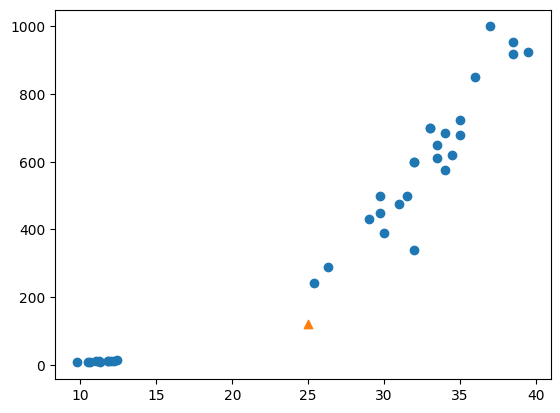

In [20]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25,120,marker = '^')

In [21]:
kn.kneighbors([[25,120]]) # [25,120]와 가까이 있는 데이터의 거리를 보여줌. 

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[107.34207004, 108.55726599, 110.78916915, 110.88845747,
         110.96413835]]),
 array([[27, 10,  3,  4, 31]]))

In [23]:
# 점수 -> 표준 점수로 바꾸기 (평균 빼고 표준편차 나누기)

mean = train_input.mean()
std = train_input.std()

print(mean)
print(std)

Length2     26.338889
Weight     431.019444
dtype: float64
Length2     10.522229
Weight     331.225128
dtype: float64


In [26]:
# 표준 점수 구하기

train_scaled = (train_input - mean) / std # mean = 27

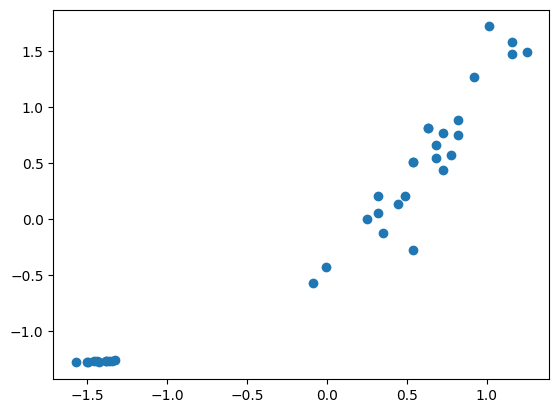

In [28]:
# x축과 y축의 간격 동일화

plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [29]:
# 학습

kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [30]:
# 평가 : 평가를 할때도 표준 점수화해야 함. (학습에 표준점수화 했으므로)

test_scaled = (test_input - mean) / std

In [31]:
kn.score(test_scaled, test_target)

1.0

In [33]:
new = ([25,150] - mean) / std
new

Length2   -0.127244
Weight    -0.848424
dtype: float64

In [34]:
kn.predict([new])

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## **penguins 연습 문제**
- Adelie, Gentoo 기준으로 bill_depth_mm, body_mass_g	

In [1]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# 1. 결측치 확인, 제거

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df = df.dropna() #df.dropna(inplace = True) / 원본 데이터에 저장

In [6]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [8]:
# 2. pg_data, pg_target 만들기

cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
pg_data

,bill_depth_mm,body_mass_g
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0
...,...,...
338,13.7,4925.0
340,14.3,4850.0
341,15.7,5750.0
342,14.8,5200.0


In [16]:
pg_target = df.loc[cond, ['species']]

#pg_target

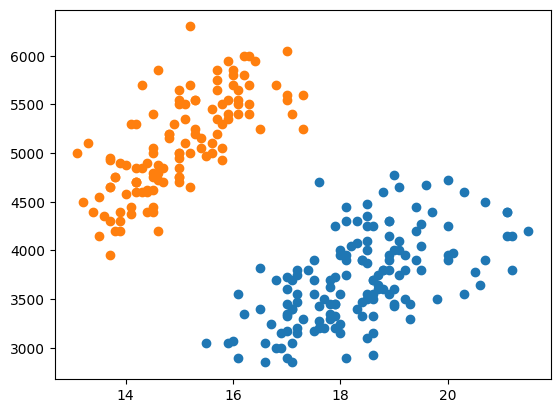

In [14]:
# 3. 산포도 확인

import matplotlib.pyplot as plt

plt.scatter(df.loc[df['species'] == 'Adelie', 'bill_depth_mm'], df.loc[df['species'] == 'Adelie', 'body_mass_g'])
plt.scatter(df.loc[df['species'] == 'Gentoo', 'bill_depth_mm'], df.loc[df['species'] == 'Gentoo', 'body_mass_g'])

In [17]:
# 4. 넣고 섞어주기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(pg_data, pg_target)

In [18]:
# 5. 표준점수 구하기

mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std 

In [19]:
# 6. 가장 가까운 K개의 데이터(이웃)를 보고 다수결로 결정

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [21]:
# 7. 학습 
kn.fit(train_scaled, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [22]:
# 8. 평가

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0